In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
    #Malgun 
%matplotlib inline

In [2]:
df1 = pd.read_csv('../data/어린이 교통사고 구역 및 현황/서울시 어린이 교통사고 (2005~2009).csv')
df2 = pd.read_csv('../data/어린이 교통사고 구역 및 현황/서울시 어린이 교통사고(2010~2014).csv')
df3 = pd.read_csv('../data/어린이 교통사고 구역 및 현황/서울시 어린이 교통사고(2015~2019).csv')
df4 = pd.read_csv('../data/어린이 교통사고 구역 및 현황/서울시 어린이 교통사고(2020).csv')

In [3]:
df1

,2005,2006,2007,2008,2009
0,"1,453","1,340","1,224","1,248","1,235"


In [4]:
df2

,2010,2011,2012,2013,2014
0,1101,991,771,772,806


In [5]:
df3

,2015,2016,2017,2018,2019
0,738,656,615,557,634


In [6]:
df4

,2020
0,273


In [7]:
df1 = df1.T
df2 = df2.T
df3 = df3.T
df4 = df4.T

In [8]:
df1[0] = df1[0].str.replace(',','')
df1

,0
2005,1453
2006,1340
2007,1224
2008,1248
2009,1235


In [9]:
df2.columns = [0]
df2

,0
2010,1101
2011,991
2012,771
2013,772
2014,806


In [10]:
df3

,0
2015,738
2016,656
2017,615
2018,557
2019,634


In [11]:
df4

,0
2020,273


In [12]:
all = pd.concat([df1,df2,df3,df4],axis=0)

In [13]:
all.columns=['사고합계']

In [14]:
all['사고합계'] = all['사고합계'].astype(int)

In [15]:
# all.to_csv('data2/어린이 보호구역 사고(2005~2020).csv')

In [16]:
all.head()

,사고합계
2005,1453
2006,1340
2007,1224
2008,1248
2009,1235


In [17]:
r = pd.read_csv('../data/어린이 교통사고 구역 및 현황/년도별 어린이 보호구역 합계.csv', index_col=0)

In [18]:
r = r.T
r.head()

,년도별,총합계
1995,212,212
1996,104,316
1997,176,492
1998,143,635
1999,16,651


In [19]:
r.drop('년도별', axis=1,inplace=True)

In [20]:
r.drop(['1995'], inplace=True)

In [21]:
r.drop(['1996','1997','1998','1999','2000','2001','2002','2003','2004'],inplace=True)

In [22]:
r.drop(['2021'],inplace=True)

In [25]:
r.head()

,총합계
2005,738
2006,811
2007,875
2008,963
2009,1066


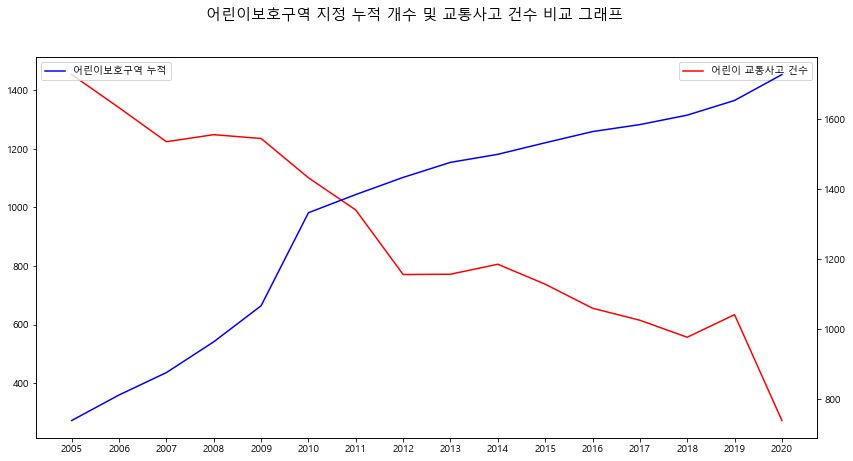

<Figure size 2160x1440 with 0 Axes>

In [24]:
plt.rcParams['figure.figsize'] = (14,7)
fig, ax1 = plt.subplots()
plt.figure(figsize=(30,20))
ax1.plot(all.index, all['사고합계'], color='red', label='어린이 교통사고 건수')
fig.suptitle('어린이보호구역 지정 누적 개수 및 교통사고 건수 비교 그래프', fontsize=15)
ax2 = ax1.twinx()
ax2.plot(r.index, r['총합계'], color='blue', label = '어린이보호구역 누적')
ax1.legend()
ax2.legend()

plt.show()